<a href="https://colab.research.google.com/github/Prathibhath/Simple-Machine-Learning-Model/blob/main/SGPA_Prediction_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGPA Prediction Using Machine Learning

This Colab notebook predicts the 6th semester SGPA based on SGPA from Semester 1 to 5 using Linear and Ridge Regression.

## Upload Dataset

In [37]:
from google.colab import files
uploaded = files.upload()

Saving SGPA Consolidated Sem1 to 6 Corrected.xlsx to SGPA Consolidated Sem1 to 6 Corrected (2).xlsx


## Install and Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Load and View Dataset

In [39]:
df = pd.read_excel('SGPA Consolidated Sem1 to 6 Corrected.xlsx')
display(df)

,Index Number,Sem 1,Sem 2,Sem 3,Sem 4,Sem 5,Sem 6
0,D/ENG/22/0052/ET,2.9500,2.7500,3.1556,3.3647,3.4375,3.035
1,D/ENG/22/0090/ET,3.2800,2.5111,0.7000,2.0000,2.0000,2.055
2,D/ENG/22/0085/ET,3.1063,3.2000,3.5833,2.9588,3.1438,3.195
3,D/ENG/22/0002/ET,3.1688,2.7667,3.2389,3.0765,3.5000,3.310
4,D/ENG/22/0137/ET,3.5063,3.4222,3.8333,2.0000,3.7000,3.930
5,D/ENG/22/0036/ET,3.3563,2.8333,3.7556,3.0765,3.0750,2.845
6,D/ENG/22/0079/ET,2.9063,2.8056,3.3778,3.2529,2.6063,2.945
7,D/ENG/22/0111/ET,2.8250,2.0556,2.8222,3.6253,3.3375,2.570
8,D/ENG/22/0029/ET,2.9188,2.5111,2.9778,2.0000,3.0000,2.665
9,D/ENG/22/0066/ET,2.9625,2.1000,2.2222,2.7706,2.1813,2.000


## Data Preprocessing

In [48]:
X = df.iloc[:, 1:6]  # Sem 1 to Sem 5
y = df.iloc[:, 6]    # Sem 6

## Train-Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear & Ridge Regression Models

In [50]:
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge()

## Model Evaluation

In [51]:
lr_preds = lr_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)

print("Linear Regression")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R2:", r2_score(y_test, lr_preds))

print("\nRidge Regression")
print("MSE:", mean_squared_error(y_test, ridge_preds))
print("R2:", r2_score(y_test, ridge_preds))

Linear Regression
MSE: 0.27832894092125293
R2: 0.2564248928559557

Ridge Regression
MSE: 0.2476837161822267
R2: 0.338295740326402


## Predict SGPA for a New Student

In [52]:
def predict_sgpa(sem1, sem2, sem3, sem4, sem5, model=ridge_model):
    input_data = np.array([[sem1, sem2, sem3, sem4, sem5]])
    return round(model.predict(input_data)[0], 2)

## Interactive Input

In [45]:
sems = [float(input(f"Enter SGPA for Semester {i+1}: ")) for i in range(5)]
input_df = pd.DataFrame([sems], columns=['Sem 1', 'Sem 2', 'Sem 3', 'Sem 4', 'Sem 5'])
print("Predicted Sem 6 SGPA:", round(ridge_model.predict(input_df)[0], 2))

Enter SGPA for Semester 1: 2.1
Enter SGPA for Semester 2: 3.2
Enter SGPA for Semester 3: 2.5
Enter SGPA for Semester 4: 2.1
Enter SGPA for Semester 5: 2.6
Predicted Sem 6 SGPA: 2.64


## Correlation Heatmap

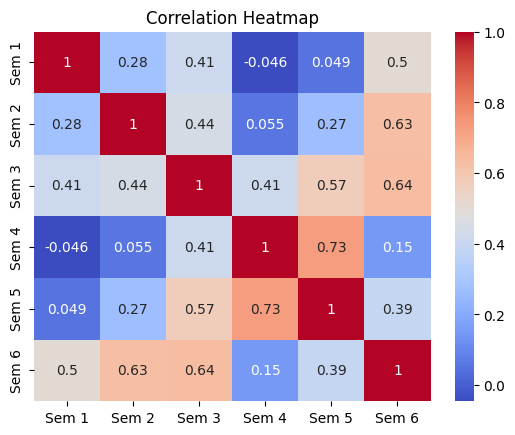

In [53]:
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Visualize Model Predictions

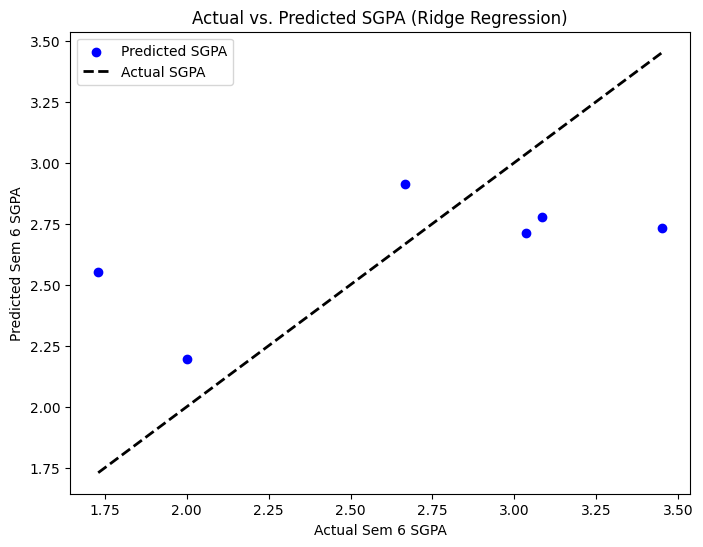

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_preds, c='blue', label='Predicted SGPA')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual SGPA')
plt.xlabel("Actual Sem 6 SGPA")
plt.ylabel("Predicted Sem 6 SGPA")
plt.title("Actual vs. Predicted SGPA (Ridge Regression)")
plt.legend()
plt.show()